# 2. FCNN 이용하여 MINST 분류하기 
### 1번과 거의 같지만, 약간 내용 수정해서 MINST 분류함.

## Import modules

In [43]:
import tensorflow as tf

## 데이터 불러오기

In [56]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [57]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [58]:
y_train.shape, y_test.shape

((60000,), (10000,))

## 네트워크 구조 정의

#### ㅇ FCNN 이므로 입력 데이터를 쭉 나열해야 하므로 Flatten 함수를 사용함.

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [60]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [61]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

## Keras 모델 Compile

In [62]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [63]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [64]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 학습 수행

In [65]:
EPOCHS = 50
BATCH_SIZE = 1024

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [67]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [68]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59392/60000 [============================>.] - ETA: 0s - loss: 0.8490 - accuracy: 0.7614
Epoch 00001: val_accuracy improved from -inf to 0.90420, saving model to best_model.h5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.8442 - accuracy: 0.7628 - val_loss: 0.3489 - val_accuracy: 0.9042
Epoch 2/50
59392/60000 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.9013
Epoch 00002: val_accuracy improved from 0.90420 to 0.92650, saving model to best_model.h5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3485 - accuracy: 0.9015 - val_loss: 0.2601 - val_accuracy: 0.9265
Epoch 3/50
59392/60000 [============================>.] - ETA: 0s - loss: 0.2775 - accuracy: 0.9219
Epoch 00003: val_accuracy improved from 0.92650 to 0.93740, saving model to best_model.h5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2769 - accuracy: 0.9220 - val_loss:

59392/60000 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9811
Epoch 00026: val_accuracy improved from 0.97710 to 0.97730, saving model to best_model.h5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.0736 - val_accuracy: 0.9773
Epoch 27/50
59392/60000 [============================>.] - ETA: 0s - loss: 0.0595 - accuracy: 0.9825
Epoch 00027: val_accuracy improved from 0.97730 to 0.97790, saving model to best_model.h5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0594 - accuracy: 0.9825 - val_loss: 0.0739 - val_accuracy: 0.9779
Epoch 28/50
59392/60000 [============================>.] - ETA: 0s - loss: 0.0598 - accuracy: 0.9822
Epoch 00028: val_accuracy did not improve from 0.97790
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0711 - val_accuracy: 0.9778
Epoch 29/50
59392/60000 [============================>.] - E

## 학습 결과 테스트

In [69]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0656 - accuracy: 0.9802


[0.06562311298339628, 0.9802]

## 성능 그래프

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
x_range = range(1,len(history.history['accuracy'])+1)

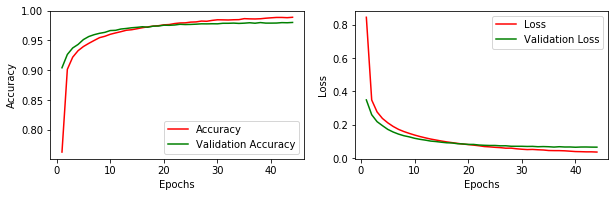

In [72]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 실전 테스트

In [73]:
x_test[0].shape

(784,)

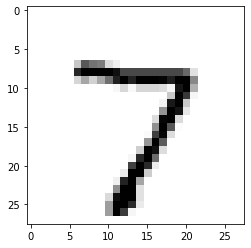

The Answer is  [7]


In [79]:
n = 0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape(1,28*28)))

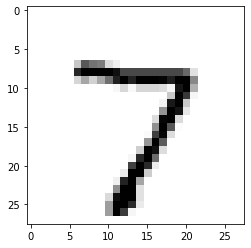

The Answer is  [[1.4009700e-08 1.8132864e-09 1.7795819e-07 1.1393610e-04 1.5357125e-11
  4.2255024e-08 1.2094495e-12 9.9988484e-01 1.6763769e-08 9.4851077e-07]]


In [80]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict(x_test[n].reshape(1,28*28)))